![AIAP Banner](../images/AIAP-Banner.png "AIAP Banner")

<h1><center>Assignment 1 - Part 1: 
<br>
Data Cleaning & Feature Engineering</center></h1>

<h3>Name: Wong Khee Ern</h3>

---

# Before starting...

### How to structure your answers

There are many different ways to approach a problem in AI/ML. When attempting the problems in the notebooks, keep in mind that there is no definite "correct way" to handle any problem. Instead, when choosing which method to use, focus on how current literature approaches the problem, how you intend to evaluate the effectiveness of the solution you are proposing and how to improve the solution if necessary. Similarly, for the "open-ended" questions, it is important to substantiate your answers with supporting reasons. Be sure to bounce your ideas off each other to see how different people approach the same problem!

### Coding conventions

Learning good habits and ensuring your code follows a certain convention is very important in an environment where your code will be shared and read by others. Following the standard conventions highlighted in the [PEP-8 document](https://www.python.org/dev/peps/pep-0008/) is a good start.

### Reproducible Data Pipeline

In the next few sections, you will be creating a data pipeline in a step by step process. At the end of this notebook, you have to combine all of these steps into a Python module named `datapipeline.py` in the [src folder](./src). The module should contain at least a function with the following signature:

```python
def transform(data_path):
  """
  :param data_path: ......
  :return: ......
  """
  return feature_engineered_dataframe
```

Once complete, you will be able to use this function freely in this notebook or other notebooks. This will ensure consistency in the data transformation process.

# 1. Introduction

Most machine learning projects follow a typical flow. 

    - Defining the problem statement
    - Identifying an appropriate dataset
    - Extracting the relevant data from data sources
    - Defining and labelling the dataset
    - Data cleaning
    - Exploring the dataset, refered to as Exploratory Data Analysis (EDA)
    - Feature engineering
    - Selecting and training appropriate models
    - Evaluating the model
    - Repeating the above steps (data identification to model evaluation) until desired performance is achieved
    - Deploying the model
    - Model maintenance and retraining (if necessary)


For this assignment, we will explore clustering in unsupervised learning. Keep this in mind when performing the data preparation steps (data extraction, data cleaning, EDA and feature engineering) in the next sections of this notebook.

#### 1.1. Topics
1. SQL query
2. Data cleaning
3. Exploratory data analysis
4. Feature Engineering
5. Data pipeline

#### 1.2. Deliverables
1. Jupyter notebook
2. Script: `datapipeline.py`

# 2. Data Extraction

The data for this assignment were modified from the US census-income dataset on the UCI dataset repository. **Please do not download the data directly from the UCI repository. Instead, follow the instructions below to query the dataset from our database.** Additionally, please refer to this [link](https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html) for a description of the variables.

The data are stored in a database. If you are not familiar with databases, please refer to this [link](https://medium.com/@rwilliams_bv/intro-to-databases-for-people-who-dont-know-a-whole-lot-about-them-a64ae9af712) to obtain a high level overview of databases and their related terms.

The type of database used is an Azure SQL Server instance. SQL Server is Microsoft's RDBMS product offering which uses a variant of SQL (Structured Query Language) called T-SQL (Microsoft Transact-SQL).
There are many resources available online to learn how to write T-SQL and you should be able to find one that fits to your level of understanding. One such resource is on [TutorialsPoint](https://www.tutorialspoint.com/t_sql/index.htm). In addition, you can use Microsoft's [reference pages](https://docs.microsoft.com/en-us/sql/t-sql/language-reference?view=sql-server-ver15) to quickly look up syntax documentation.
At a minimum, you should be able to combine and extract data from multiple tables in an efficient manner so that you can complete your assignments.

If you have trouble accessing the database, you may have to download the Microsoft ODBC Driver. Follow the download instructions for [Windows](https://docs.microsoft.com/en-us/sql/connect/odbc/windows/system-requirements-installation-and-driver-files?view=sql-server-ver15) or [Mac/Linux](https://docs.microsoft.com/en-us/sql/connect/odbc/linux-mac/installing-the-microsoft-odbc-driver-for-sql-server?view=sql-server-ver15#microsoft-odbc-driver-131-for-sql-server).

The data is hosted on an Azure SQL Server with the following details:

    server = 'aiap-training.database.windows.net'
    database = 'aiap'
    username = 'apprentice'
    password = 'Pa55w.rd'
    driver= '{ODBC Driver 17 for SQL Server}'


There are 3 separate tables, `basic_bio`, `employment`, `residential_tax`. All of these tables have an `id` column that can be used to merge them.


The pandas package has a `read_sql_query` function that can be used to access the data. You may require another python package to use this function.

#### 2.1. Query all 3 tables from the SQL server and combine them into a single pandas dataframe. Save this dataframe as a `.csv` file on your local computer with the filepath `assignment1/data/raw/data.csv`.

In [11]:
# Import libraries
import pandas as pd
import os
from sqlalchemy import create_engine
import urllib.parse
import src.keml as ke

In [12]:
# # Database connection details
# server = 'aiap-training.database.windows.net'
# database = 'aiap'
# username = 'apprentice'
# password = 'Pa55w.rd'

# # URL encode the password
# password_encoded = urllib.parse.quote_plus(password)

# # Create SQLAlchemy URL format connection string
# connection_string = f"mssql+pyodbc://{username}:{password_encoded}@{server}/{database}?driver=ODBC+Driver+18+for+SQL+Server&TrustServerCertificate=yes&Connection+Timeout=60&Encrypt=yes"

# # Create SQLAlchemy engine
# engine = create_engine(connection_string)

# # Query all 3 tables
# query = """
# SELECT *
# FROM basic_bio b
# INNER JOIN employment e ON b.id = e.id
# INNER JOIN residential_tax r ON b.id = r.id
# """

# df = pd.read_sql_query(query, engine)

In [13]:
# # Save the data (Jupyter uses current dir as the 'root')
# os.makedirs('data/raw', exist_ok=True)
# df.to_csv('data/raw/data.csv', index=False, header=list(df.columns))

# print("✅ File saved: assignment1/data/raw/data.csv")

In [14]:
# Read CSV and immediately restore original column names
def read_csv_exact(filename):
    with open(filename, 'r') as f:
        original_cols = f.readline().strip().split(',')
    df = pd.read_csv(filename)
    df.columns = original_cols
    return df

df = read_csv_exact("data/raw/data.csv")

# 3. Data Cleaning

Whenever we have a new dataset, we need to inspect and clean the dataset.

Some (non-exhaustive) steps in data cleaning are:
    - handling missing values
    - checking for irrelevant rows and/or columns
    - checking for duplicate rows and deciding whether to drop them
    
    
#### 3.1. List the steps you intend to take to clean the data in the markdown cell below. Give a brief explanation for each step.

Inspect data
1. Find out the shape of the data
2. Find out what the columns mean and its data type
3. Inspect each column individually for: (use plots to visualize if needed)
    a. Missing values (msno, )
    b. Outliers (describe(), IQR, box plots)
    c. Distribution (histogram, countplots etc.)
4. Check for duplicates
5. Check for correlation, effect sizes between different columns (corr matrix, heatmap)

Clean data
1. For each column:
    a. Missing values
        i. Check if missing values are correlated with other columns
        ii. Decide on the best way to fill in missing values
            - Ideally, try to find patterns in data to fill in missing values
            - Else, try mean, mode, median imputation
            - If too many missing values, can consider dropping the col
    b. Outliers
        i. Find out more domain knowledge to see if outliers are valid or simply data errors
        ii. Analyze their potential impact on the ML model
        iii. Identify methods to address outliers (log, winsorizing etc, knn etc.)
    c. Others
        i. Spelling errors, data type and formatting inconsistencies, formatting date time, rules violation (e.g. negative age)
2. Drop duplicate data where necessary by applying domain knowledge



#### 3.2. Write each data cleaning step as its own function so that they can be reused individually. Ideally, you should organise the functions so that they can be put into their own library. Remember to follow the [PEP8](https://www.python.org/dev/peps/pep-0008/) convention.

In [15]:
ke.data_overview(df)

📊 DATA OVERVIEW
Rows: 199,463
Columns: 50
Total size: 436.08 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199463 entries, 0 to 199462
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   id                                          199463 non-null  int64 
 1   age                                         199463 non-null  int64 
 2   education                                   199463 non-null  object
 3   enroll_in_edu_inst_last_wk                  199463 non-null  object
 4   marital_stat                                199463 non-null  object
 5   race                                        199463 non-null  object
 6   sex                                         199463 non-null  object
 7   country_of_birth_father                     199463 non-null  object
 8   country_of_birth_mother                     199463 non-null  object
 9   country_of_birth

In [16]:
df = ke.remove_duplicate_columns(df, keep='first', suffix=None)
df = ke.sort_columns_alphabetically(df, ascending=True)

Original shape: (199463, 50)
✅ Removed 8 duplicate columns (kept 'first' occurrence)
Shape after removing duplicates: (199463, 42)
✅ Columns sorted alphabetically (A-Z)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199463 entries, 0 to 199462
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   age                                         199463 non-null  int64 
 1   capital_gains                               199463 non-null  int64 
 2   capital_losses                              199463 non-null  int64 
 3   citizenship                                 199463 non-null  object
 4   class_of_worker                             199463 non-null  object
 5   country_of_birth_father                     199463 non-null  object
 6   country_of_birth_mother                     199463 non-null  object
 7   country_of_birth_self                       199463 non-null  object
 8   detailed_household_and_family_stat          199463 non-null  object
 9   detailed_household_summary_in_household     199463 non-null  object
 10  detailed

# 4. Exploratory Data Analysis

After the data has been cleaned, we now need to perform EDA to get a better understanding of the dataset. As a start, you can consider looking at the distributions of each variable as well as the correlation between each pair of variables. Please explore further if you find any meaningful insights. You can refer to this [book chapter](https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf) for detailed information on EDA.


#### 4.1. Perform EDA on the dataset. Include all figures / statistics you use. Briefly describe the purpose for each EDA step and the finding(s) from each step.

In [18]:
# Import libraries
import pandas as pd
import src.keml as ke

Found 29 categorical features: ['citizenship', 'class_of_worker', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'education', 'enroll_in_edu_inst_last_wk', 'family_members_under_18', 'fill_inc_questionnaire_for_veteran_s_admin', 'full_or_part_time_employment_stat', 'hispanic_origin', 'income_group', 'live_in_this_house_1_year_ago', 'major_industry_code', 'major_occupation_code', 'marital_stat', 'member_of_a_labor_union', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'migration_prev_res_in_sunbelt', 'race', 'reason_for_unemployment', 'region_of_previous_residence', 'sex', 'state_of_previous_residence', 'tax_filer_stat']

Analyzing feature: citizenship

Value counts and percentages for 'citizenship':
                                              Count  Percentage
citizenship                                                    

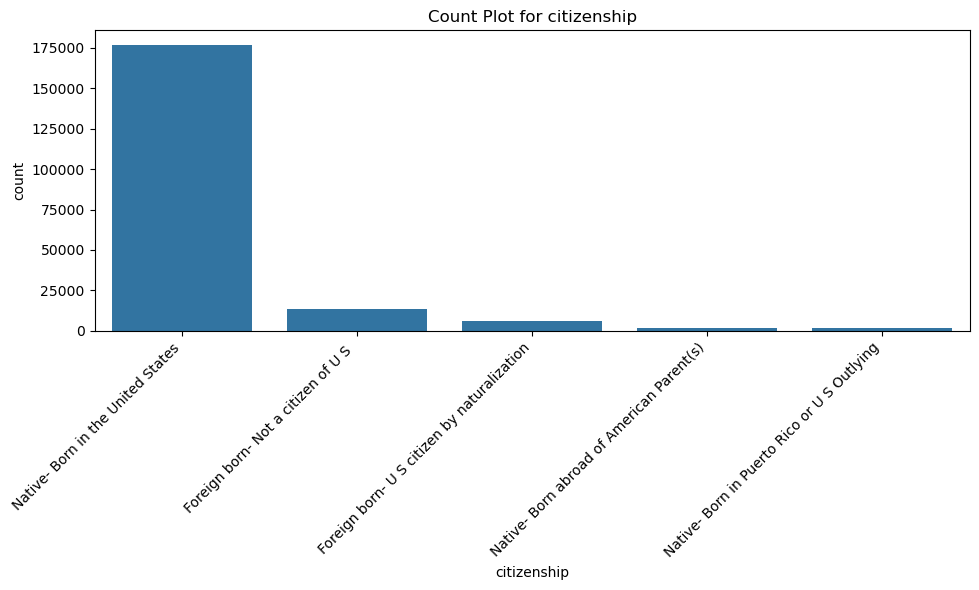


Analyzing feature: class_of_worker

Value counts and percentages for 'class_of_worker':
                                 Count  Percentage
class_of_worker                                   
Not in universe                 100220       50.24
Private                          72004       36.10
Self-employed-not incorporated    8438        4.23
Local government                  7781        3.90
State government                  4226        2.12
Self-employed-incorporated        3265        1.64
Federal government                2925        1.47
Never worked                       439        0.22
Without pay                        165        0.08

Unique values: 9
Missing values: 0


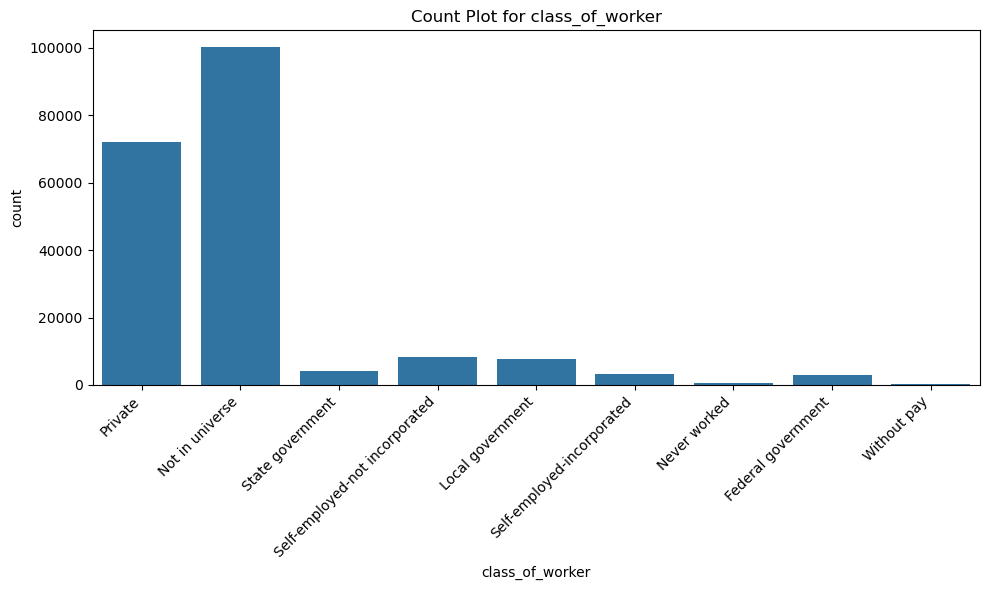


Analyzing feature: country_of_birth_father

Value counts and percentages for 'country_of_birth_father':
                               Count  Percentage
country_of_birth_father                         
United-States                 159115       79.77
Mexico                         10006        5.02
?                               6712        3.37
Puerto-Rico                     2678        1.34
Italy                           2210        1.11
Canada                          1380        0.69
Germany                         1355        0.68
Dominican-Republic              1290        0.65
Poland                          1209        0.61
Philippines                     1154        0.58
Cuba                            1124        0.56
El-Salvador                      982        0.49
China                            856        0.43
England                          793        0.40
Columbia                         614        0.31
India                            580        0.29
South Korea  

<Figure size 1000x600 with 0 Axes>

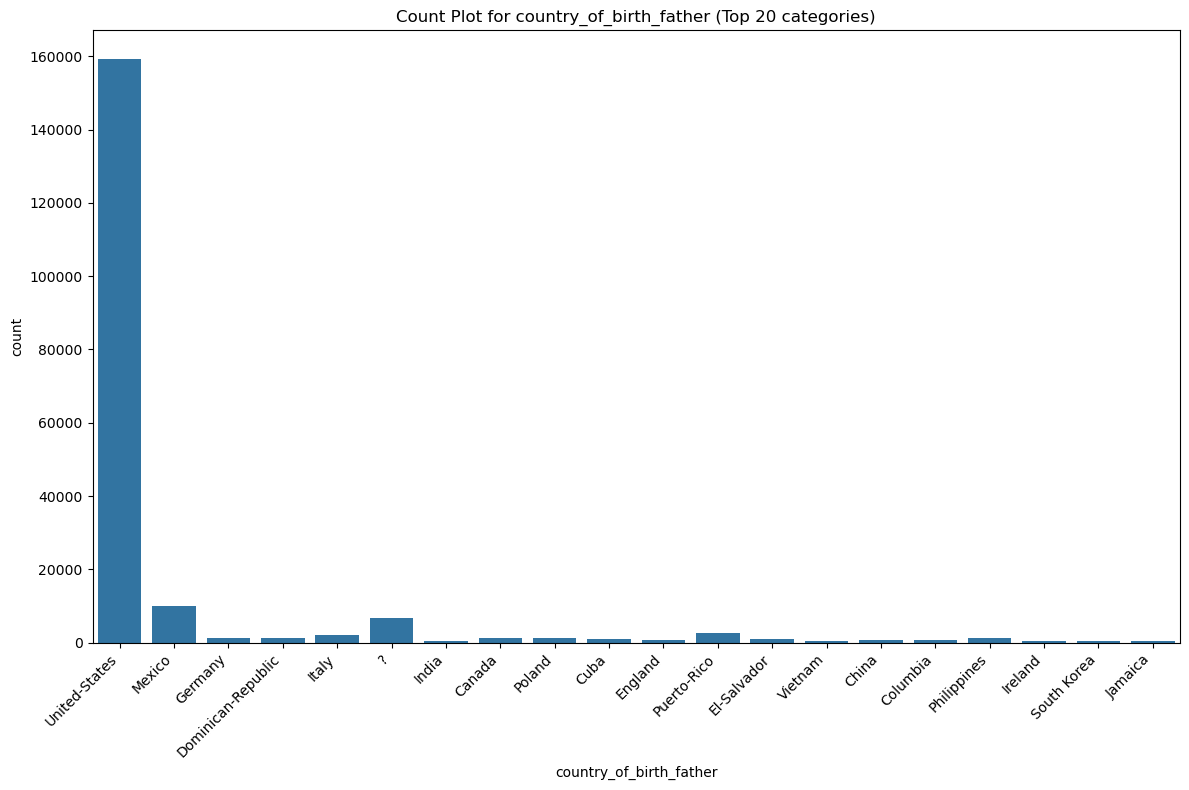


Analyzing feature: country_of_birth_mother

Value counts and percentages for 'country_of_birth_mother':
                               Count  Percentage
country_of_birth_mother                         
United-States                 160428       80.43
Mexico                          9780        4.90
?                               6117        3.07
Puerto-Rico                     2472        1.24
Italy                           1842        0.92
Canada                          1451        0.73
Germany                         1382        0.69
Philippines                     1231        0.62
Poland                          1108        0.56
El-Salvador                     1108        0.56
Cuba                            1107        0.55
Dominican-Republic              1103        0.55
England                          903        0.45
China                            760        0.38
Columbia                         612        0.31
South Korea                      609        0.31
Ireland      

<Figure size 1000x600 with 0 Axes>

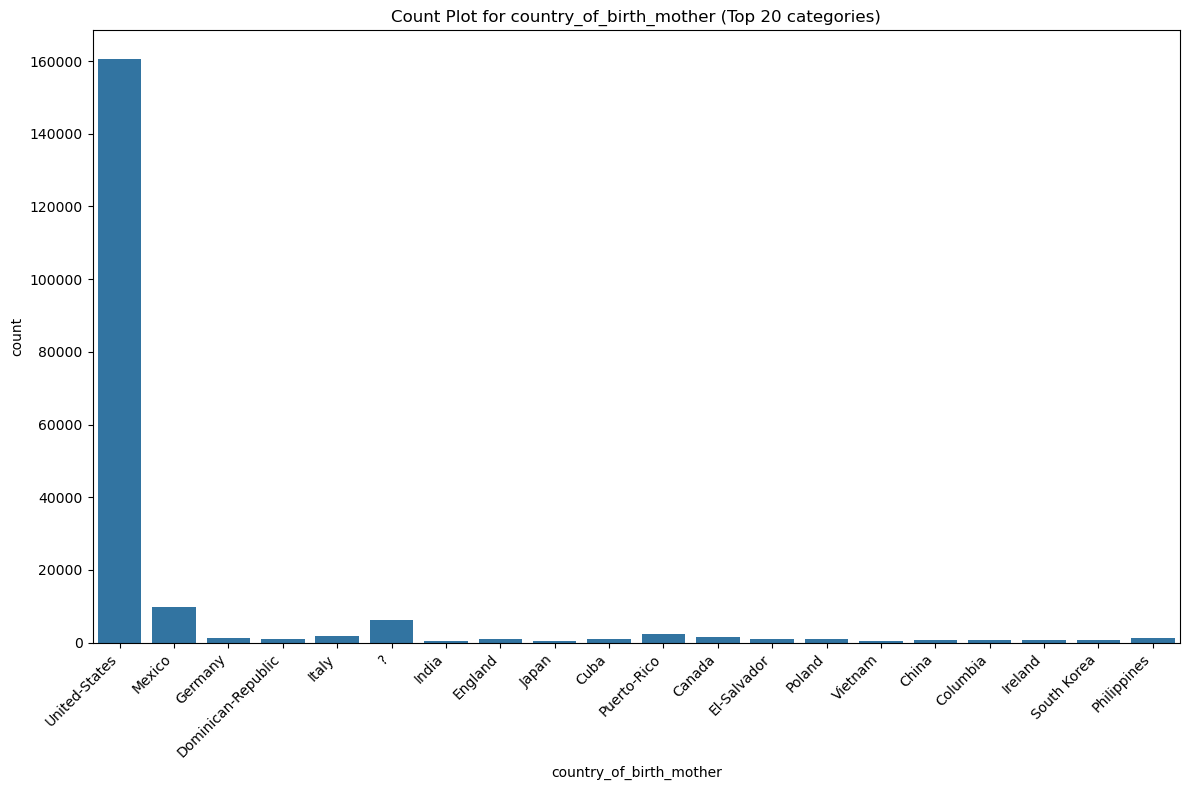


Analyzing feature: country_of_birth_self

Value counts and percentages for 'country_of_birth_self':
                               Count  Percentage
country_of_birth_self                           
United-States                 176934       88.71
Mexico                          5767        2.89
?                               3391        1.70
Puerto-Rico                     1399        0.70
Germany                          851        0.43
Philippines                      845        0.42
Cuba                             837        0.42
Canada                           700        0.35
Dominican-Republic               690        0.35
El-Salvador                      689        0.35
China                            478        0.24
South Korea                      471        0.24
England                          457        0.23
Columbia                         434        0.22
Italy                            418        0.21
India                            408        0.20
Vietnam          

<Figure size 1000x600 with 0 Axes>

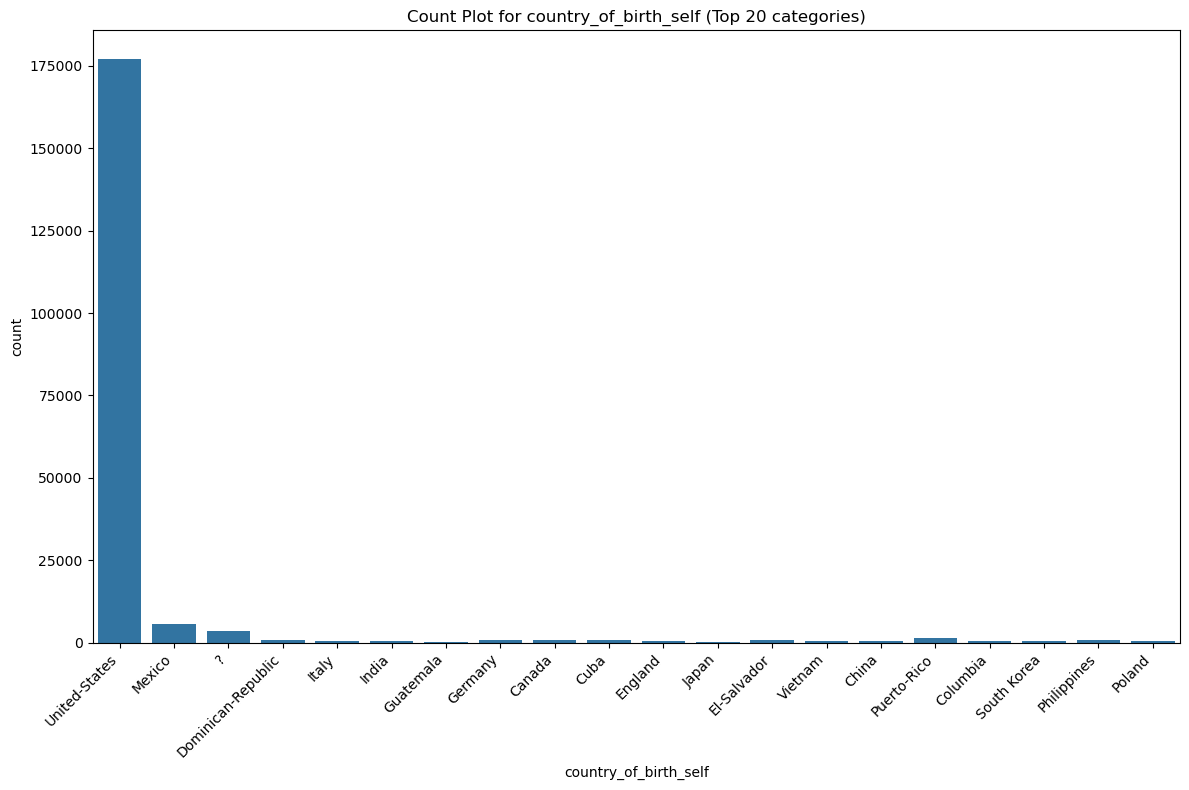


Analyzing feature: detailed_household_and_family_stat

Value counts and percentages for 'detailed_household_and_family_stat':
                                                 Count  Percentage
detailed_household_and_family_stat                                
Householder                                      53231       26.69
Child <18 never marr not in subfamily            50307       25.22
Spouse of householder                            41683       20.90
Nonfamily householder                            22209       11.13
Child 18+ never marr Not in a subfamily          12027        6.03
Secondary individual                              6121        3.07
Other Rel 18+ ever marr not in subfamily          1955        0.98
Grandchild <18 never marr child of subfamily RP   1867        0.94
Other Rel 18+ never marr not in subfamily         1728        0.87
Grandchild <18 never marr not in subfamily        1066        0.53
Child 18+ ever marr Not in a subfamily            1013        0.51
Ch

<Figure size 1000x600 with 0 Axes>

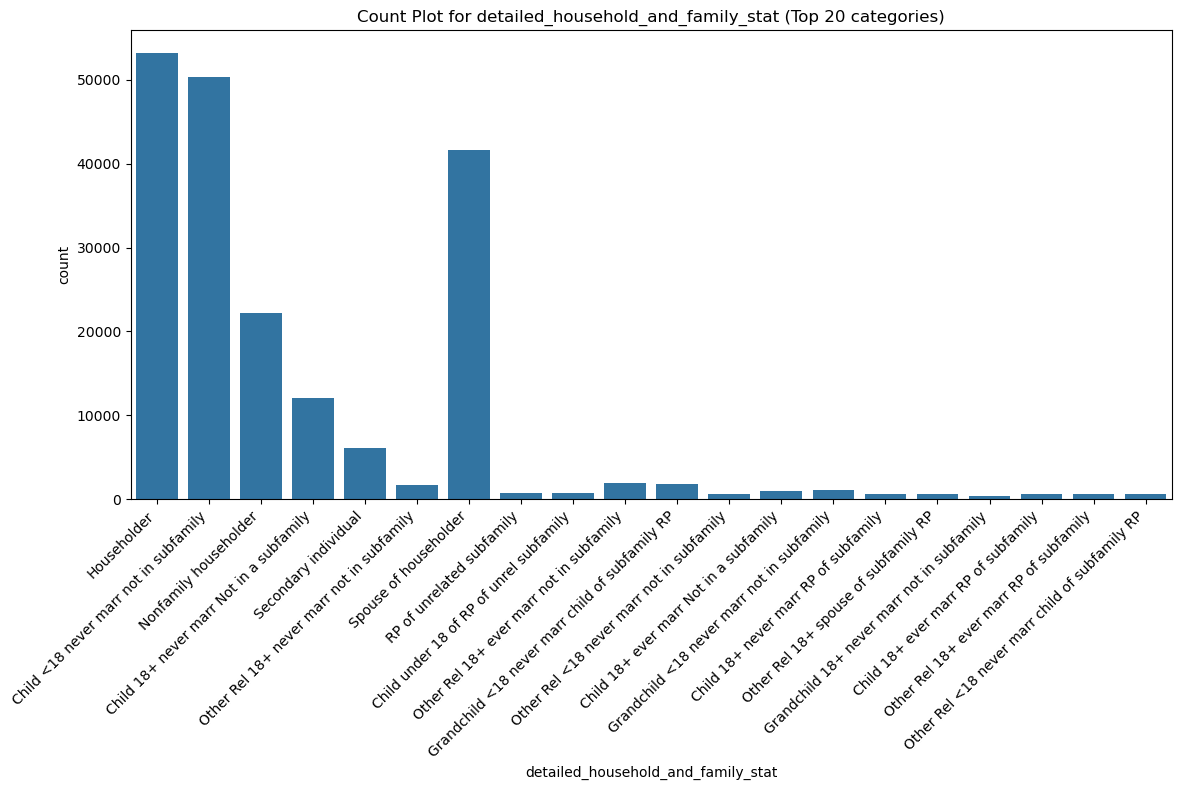


Analyzing feature: detailed_household_summary_in_household

Value counts and percentages for 'detailed_household_summary_in_household':
                                         Count  Percentage
detailed_household_summary_in_household                   
Householder                              75454       37.83
Child under 18 never married             50407       25.27
Spouse of householder                    41697       20.90
Child 18 or older                        14427        7.23
Other relative of householder             9700        4.86
Nonrelative of householder                7599        3.81
Group Quarters- Secondary individual       132        0.07
Child under 18 ever married                 47        0.02

Unique values: 8
Missing values: 0


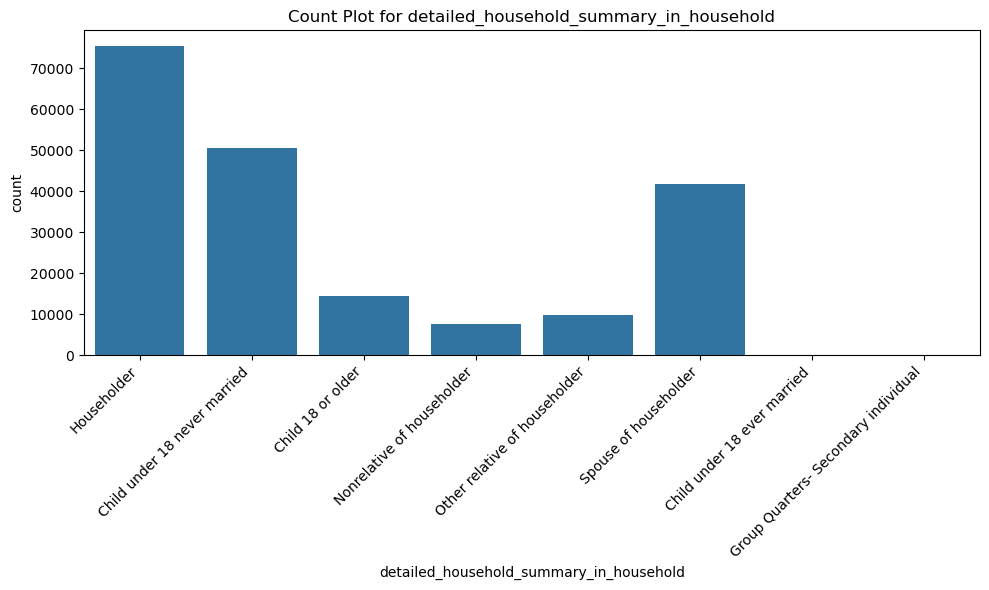


Analyzing feature: education

Value counts and percentages for 'education':
                                        Count  Percentage
education                                                
High school graduate                    48390       24.26
Children                                47404       23.77
Some college but no degree              27816       13.95
Bachelors degree(BA AB BS)              19862        9.96
7th and 8th grade                        8005        4.01
10th grade                               7555        3.79
11th grade                               6874        3.45
Masters degree(MA MS MEng MEd MSW MBA)   6541        3.28
9th grade                                6228        3.12
Associates degree-occup /vocational      5354        2.68
Associates degree-academic program       4361        2.19
5th or 6th grade                         3277        1.64
12th grade no diploma                    2125        1.07
1st 2nd 3rd or 4th grade                 1799        

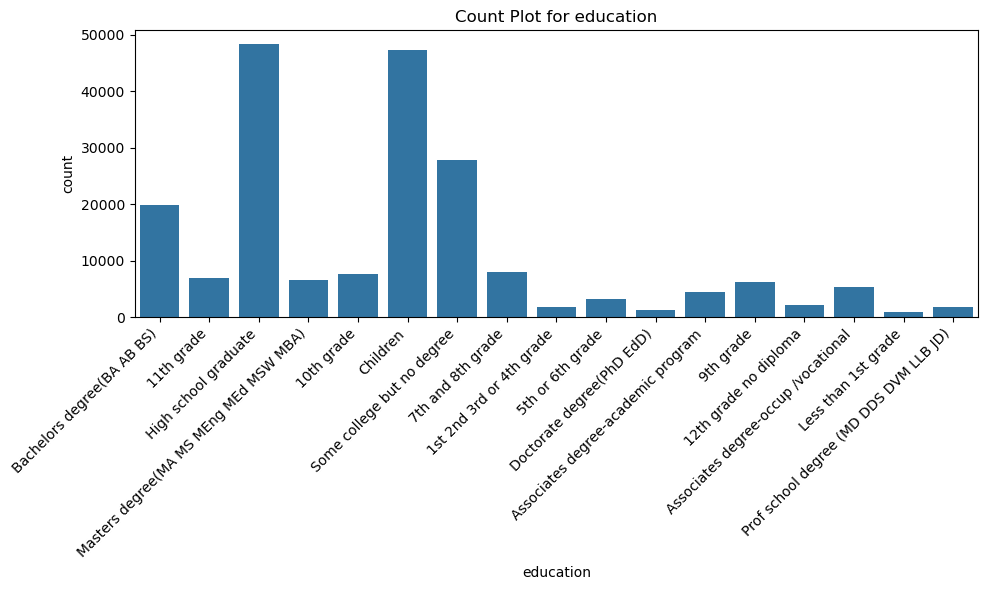


Analyzing feature: enroll_in_edu_inst_last_wk

Value counts and percentages for 'enroll_in_edu_inst_last_wk':
                             Count  Percentage
enroll_in_edu_inst_last_wk                    
Not in universe             186887       93.70
High school                   6889        3.45
College or university         5687        2.85

Unique values: 3
Missing values: 0


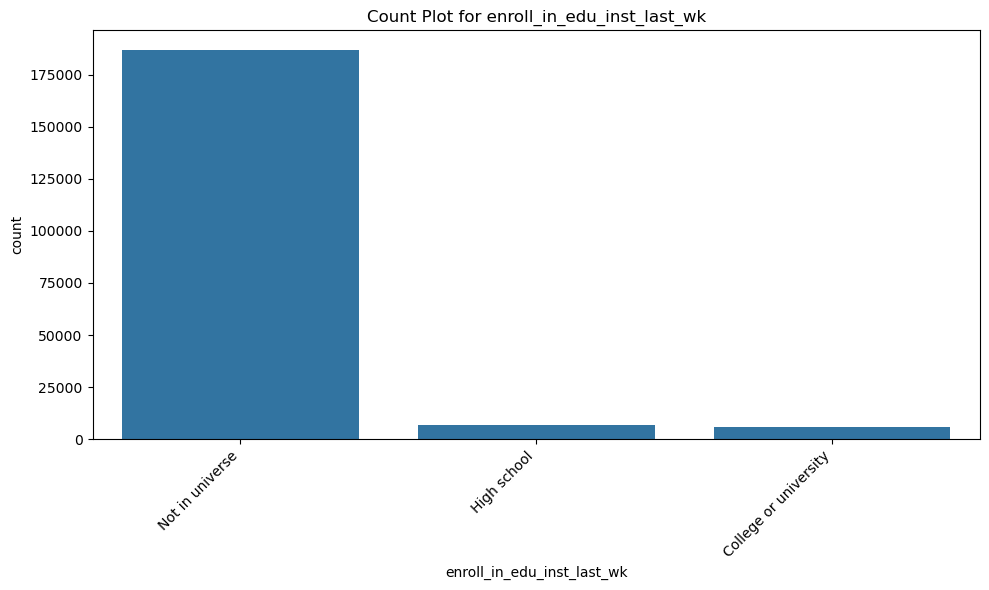


Analyzing feature: family_members_under_18

Value counts and percentages for 'family_members_under_18':
                          Count  Percentage
family_members_under_18                    
Not in universe          144193       72.29
Both parents present      38966       19.54
Mother only present       12768        6.40
Father only present        1883        0.94
Neither parent present     1653        0.83

Unique values: 5
Missing values: 0


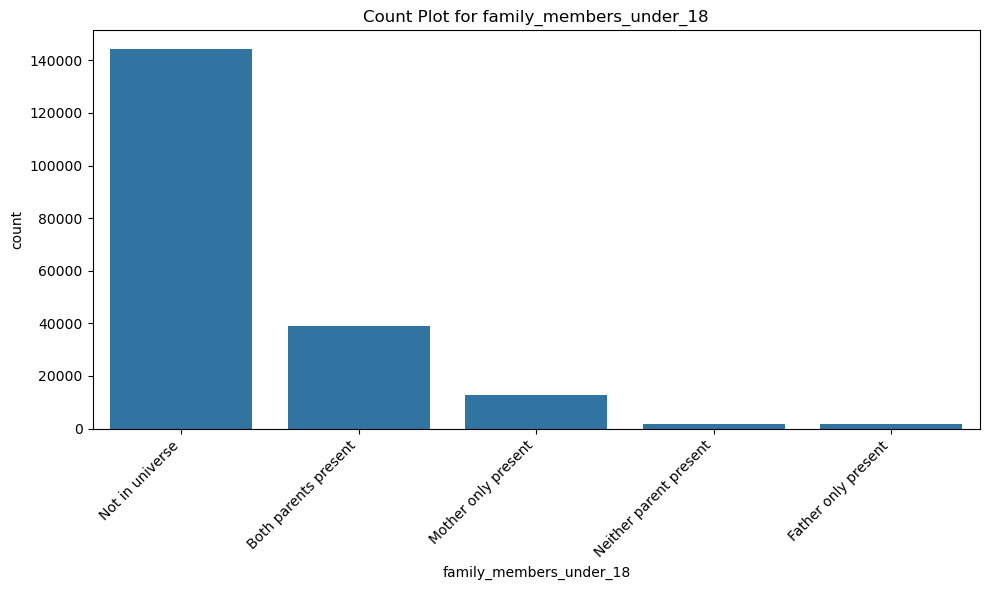


Analyzing feature: fill_inc_questionnaire_for_veteran_s_admin

Value counts and percentages for 'fill_inc_questionnaire_for_veteran_s_admin':
                                             Count  Percentage
fill_inc_questionnaire_for_veteran_s_admin                    
Not in universe                             197479       99.01
No                                            1593        0.80
Yes                                            391        0.20

Unique values: 3
Missing values: 0


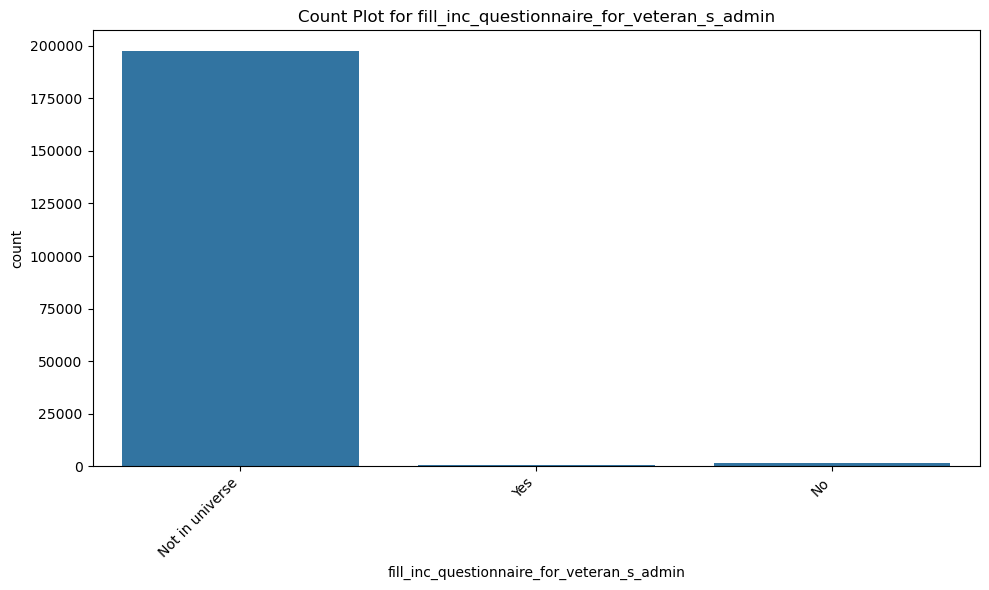


Analyzing feature: full_or_part_time_employment_stat

Value counts and percentages for 'full_or_part_time_employment_stat':
                                     Count  Percentage
full_or_part_time_employment_stat                     
Children or Armed Forces            123731       62.03
Full-time schedules                  40718       20.41
Not in labor force                   26804       13.44
PT for non-econ reasons usually FT    3322        1.67
Unemployed full-time                  2311        1.16
PT for econ reasons usually PT        1209        0.61
Unemployed part- time                  843        0.42
PT for econ reasons usually FT         525        0.26

Unique values: 8
Missing values: 0


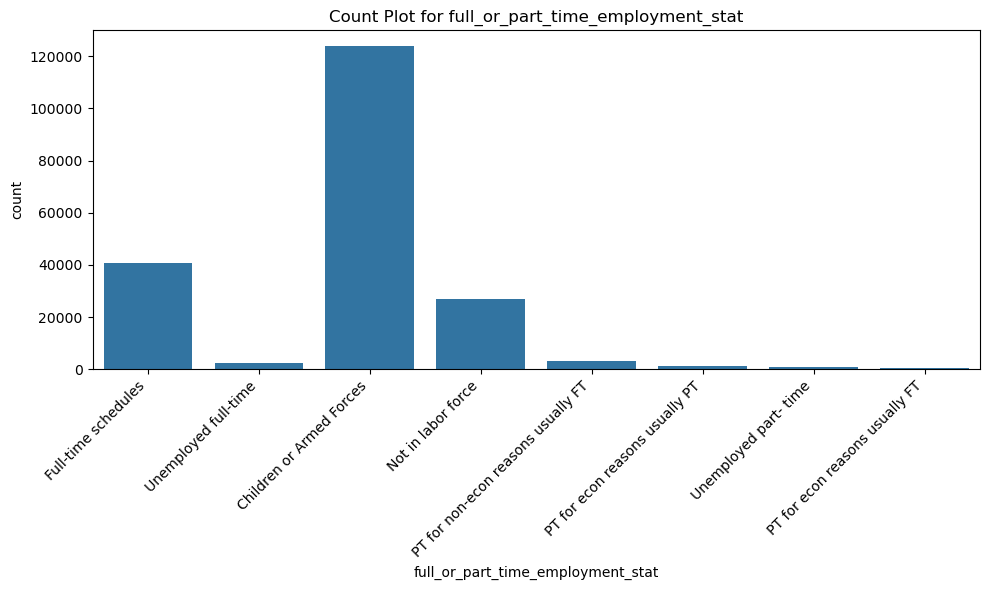


Analyzing feature: hispanic_origin

Value counts and percentages for 'hispanic_origin':
                            Count  Percentage
hispanic_origin                              
All other                  171853       86.54
Mexican-American             8078        4.07
Mexican (Mexicano)           7233        3.64
Central or South American    3894        1.96
Puerto Rican                 3311        1.67
Other Spanish                2485        1.25
Cuban                        1125        0.57
Do not know                   306        0.15
Chicano                       304        0.15

Unique values: 9
Missing values: 874


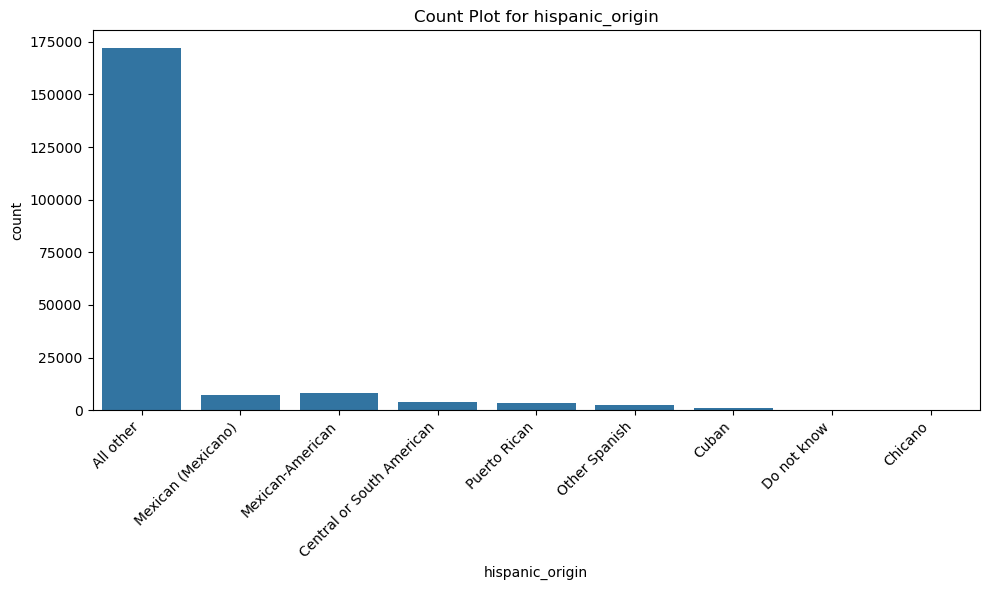


Analyzing feature: income_group

Value counts and percentages for 'income_group':
               Count  Percentage
income_group                    
- 50000.      187084       93.79
50000+.        12379        6.21

Unique values: 2
Missing values: 0


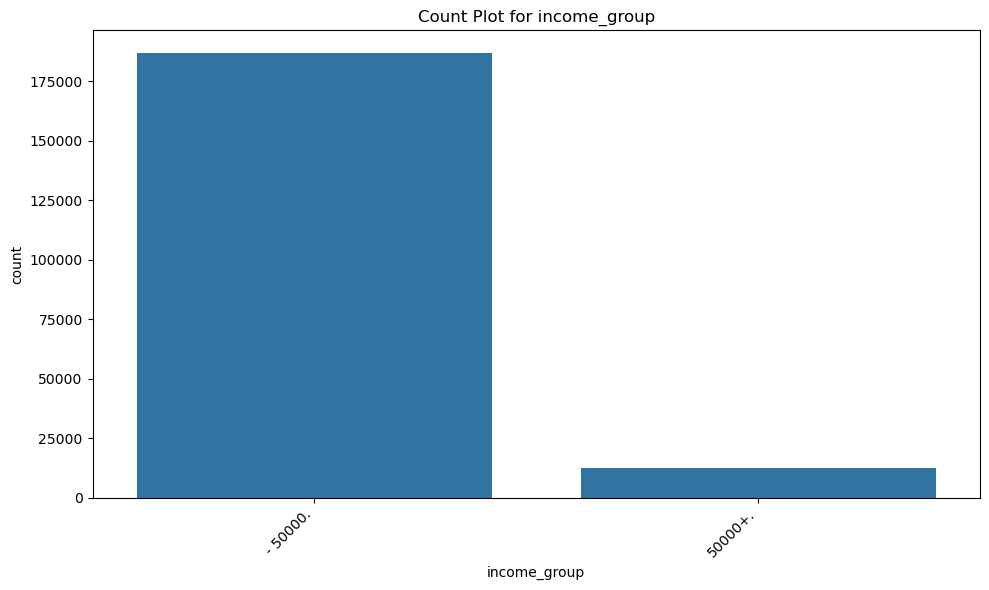


Analyzing feature: live_in_this_house_1_year_ago

Value counts and percentages for 'live_in_this_house_1_year_ago':
                                   Count  Percentage
live_in_this_house_1_year_ago                       
Not in universe under 1 year old  101177       50.72
Yes                                82515       41.37
No                                 15771        7.91

Unique values: 3
Missing values: 0


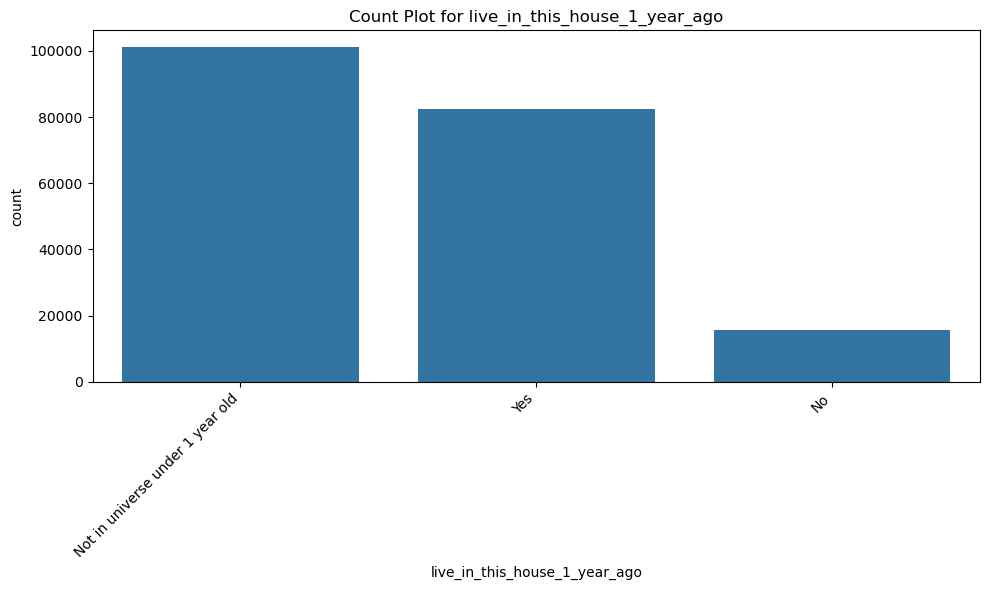


Analyzing feature: major_industry_code

Value counts and percentages for 'major_industry_code':
                                      Count  Percentage
major_industry_code                                    
Not in universe or children          100659       50.46
Retail trade                          17061        8.55
Manufacturing-durable goods            9013        4.52
Education                              8281        4.15
Manufacturing-nondurable goods         6893        3.46
Finance insurance and real estate      6144        3.08
Construction                           5982        3.00
Business and repair services           5650        2.83
Medical except hospital                4681        2.35
Public administration                  4608        2.31
Other professional services            4480        2.25
Transportation                         4208        2.11
Hospital services                      3964        1.99
Wholesale trade                        3594        1.80
Agricul

<Figure size 1000x600 with 0 Axes>

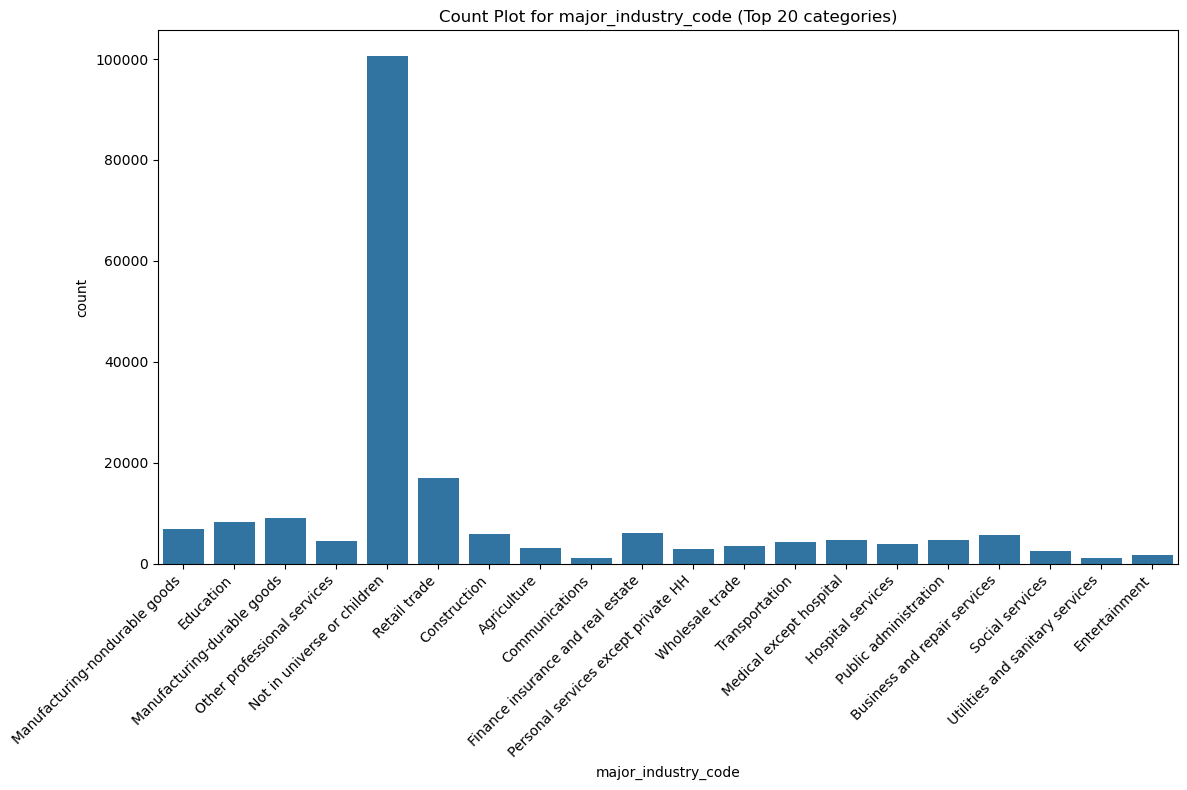


Analyzing feature: major_occupation_code

Value counts and percentages for 'major_occupation_code':
                                        Count  Percentage
major_occupation_code                                    
Not in universe                        100659       50.46
Adm support including clerical          14834        7.44
Professional specialty                  13936        6.99
Executive admin and managerial          12489        6.26
Other service                           12093        6.06
Sales                                   11779        5.91
Precision production craft & repair     10515        5.27
Machine operators assmblrs & inspctrs    6378        3.20
Handlers equip cleaners etc              4124        2.07
Transportation and material moving       4017        2.01
Farming forestry and fishing             3145        1.58
Technicians and related support          3017        1.51
Protective services                      1661        0.83
Private household services   

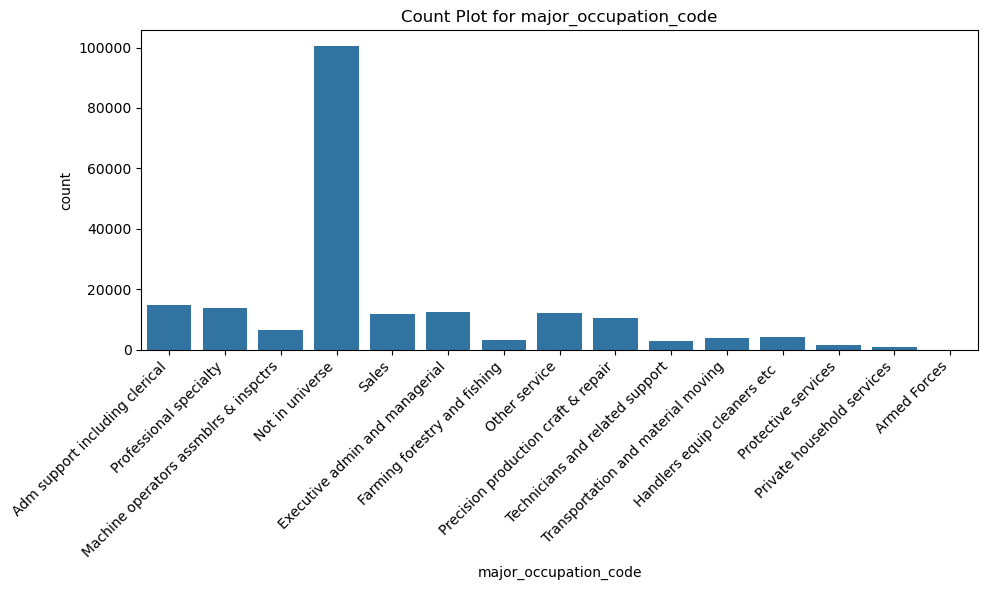


Analyzing feature: marital_stat

Value counts and percentages for 'marital_stat':
                                 Count  Percentage
marital_stat                                      
Never married                    86457       43.34
Married-civilian spouse present  84199       42.21
Divorced                         12704        6.37
Widowed                          10461        5.24
Separated                         3459        1.73
Married-spouse absent             1518        0.76
Married-A F spouse present         665        0.33

Unique values: 7
Missing values: 0


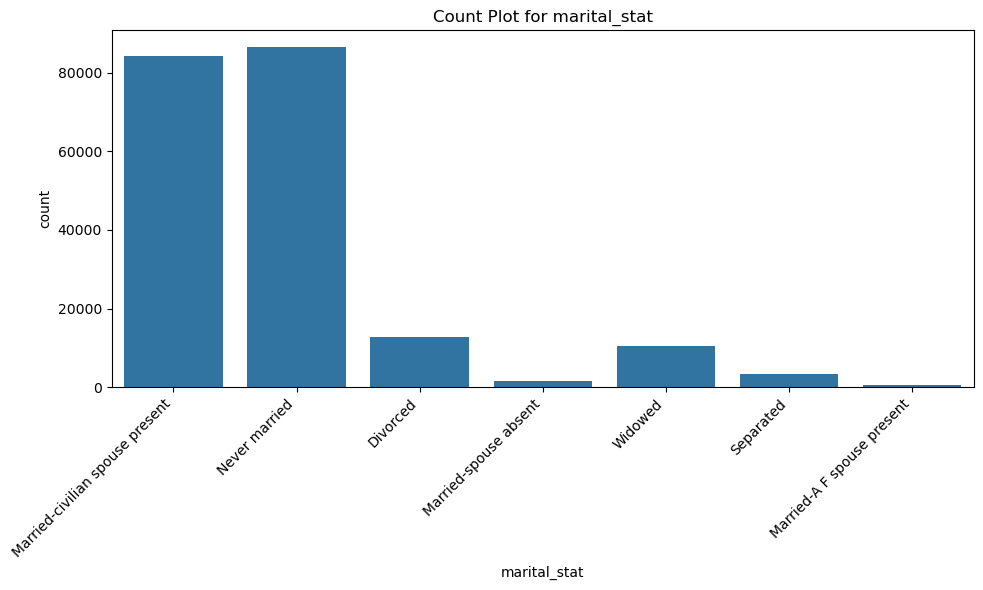


Analyzing feature: member_of_a_labor_union

Value counts and percentages for 'member_of_a_labor_union':
                          Count  Percentage
member_of_a_labor_union                    
Not in universe          180408       90.45
No                        16027        8.04
Yes                        3028        1.52

Unique values: 3
Missing values: 0


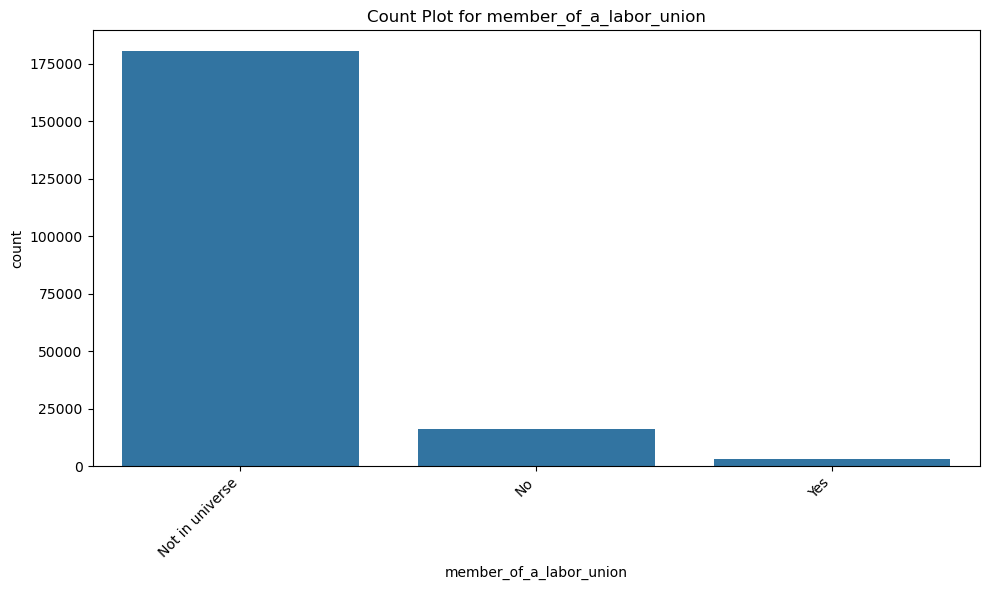


Analyzing feature: migration_code_change_in_msa

Value counts and percentages for 'migration_code_change_in_msa':
                              Count  Percentage
migration_code_change_in_msa                   
?                             99661       49.96
Nonmover                      82515       41.37
MSA to MSA                    10600        5.31
NonMSA to nonMSA               2811        1.41
Not in universe                1516        0.76
MSA to nonMSA                   790        0.40
NonMSA to MSA                   615        0.31
Abroad to MSA                   453        0.23
Not identifiable                429        0.22
Abroad to nonMSA                 73        0.04

Unique values: 10
Missing values: 0


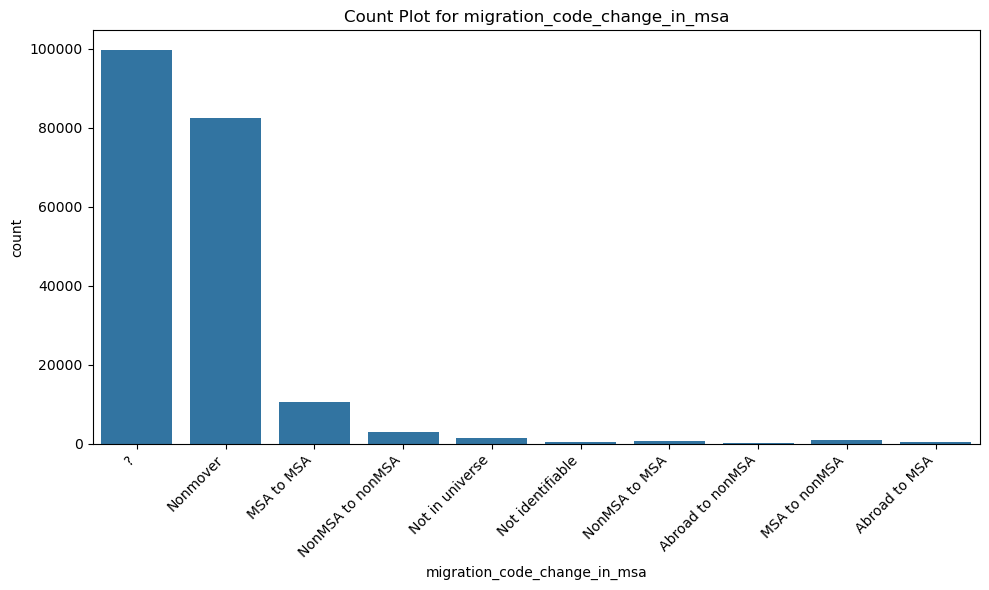


Analyzing feature: migration_code_change_in_reg

Value counts and percentages for 'migration_code_change_in_reg':
                                Count  Percentage
migration_code_change_in_reg                     
?                               99661       49.96
Nonmover                        82515       41.37
Same county                      9810        4.92
Different county same state      2797        1.40
Not in universe                  1516        0.76
Different region                 1178        0.59
Different state same division     991        0.50
Abroad                            530        0.27
Different division same region    465        0.23

Unique values: 9
Missing values: 0


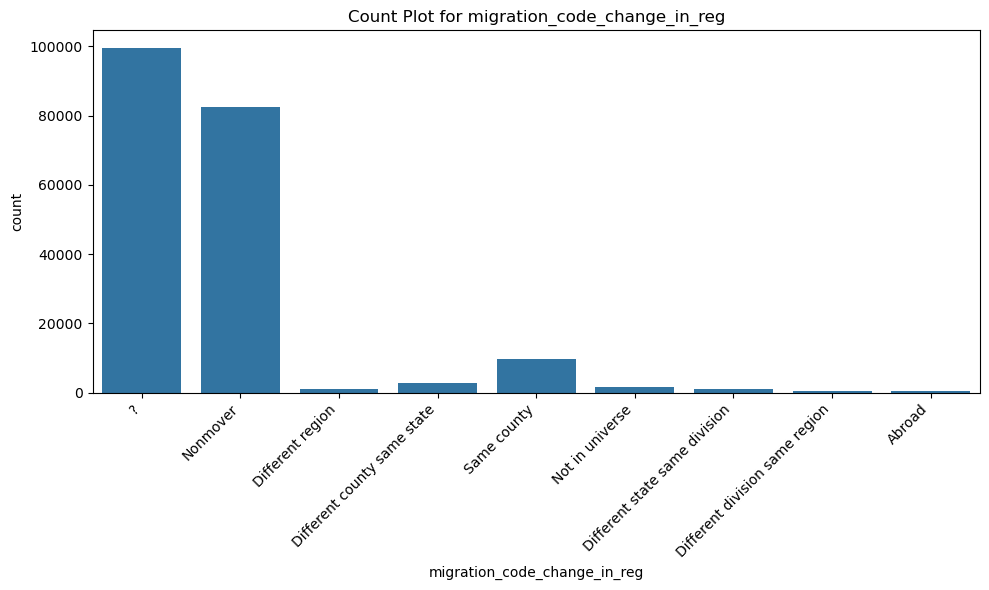


Analyzing feature: migration_code_move_within_reg

Value counts and percentages for 'migration_code_move_within_reg':
                                Count  Percentage
migration_code_move_within_reg                   
?                               99661       49.96
Nonmover                        82515       41.37
Same county                      9810        4.92
Different county same state      2797        1.40
Not in universe                  1516        0.76
Different state in South          973        0.49
Different state in West           679        0.34
Different state in Midwest        551        0.28
Abroad                            530        0.27
Different state in Northeast      431        0.22

Unique values: 10
Missing values: 0


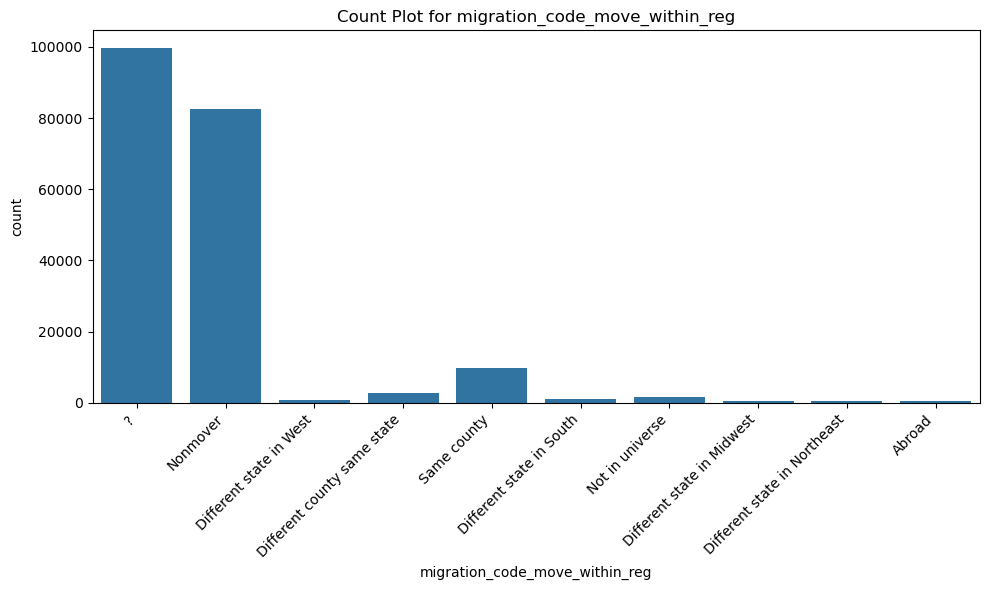


Analyzing feature: migration_prev_res_in_sunbelt

Value counts and percentages for 'migration_prev_res_in_sunbelt':
                               Count  Percentage
migration_prev_res_in_sunbelt                   
?                              99661       49.96
Not in universe                84031       42.13
No                              9985        5.01
Yes                             5786        2.90

Unique values: 4
Missing values: 0


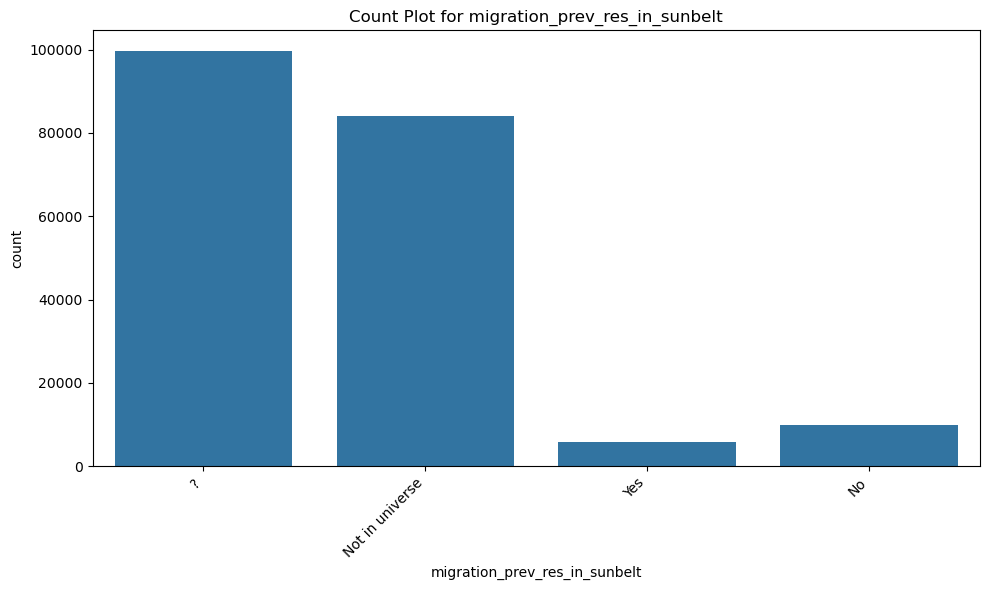


Analyzing feature: race

Value counts and percentages for 'race':
                              Count  Percentage
race                                           
White                        167314       83.88
Black                         20408       10.23
Asian or Pacific Islander      5835        2.93
Other                          3657        1.83
Amer Indian Aleut or Eskimo    2249        1.13

Unique values: 5
Missing values: 0


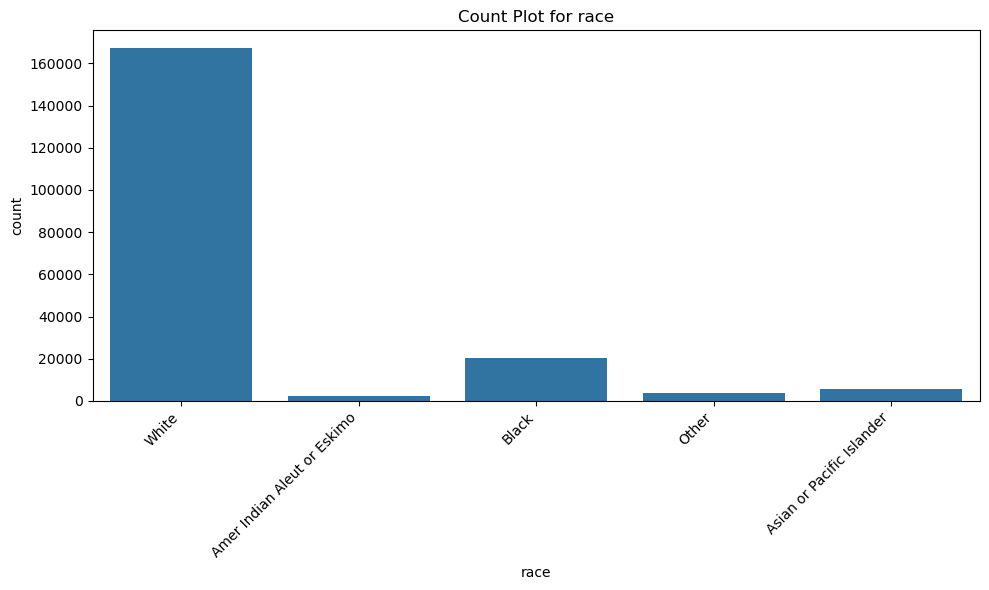


Analyzing feature: reason_for_unemployment

Value counts and percentages for 'reason_for_unemployment':
                          Count  Percentage
reason_for_unemployment                    
Not in universe          193393       96.96
Other job loser            2038        1.02
Re-entrant                 2019        1.01
Job loser - on layoff       976        0.49
Job leaver                  598        0.30
New entrant                 439        0.22

Unique values: 6
Missing values: 0


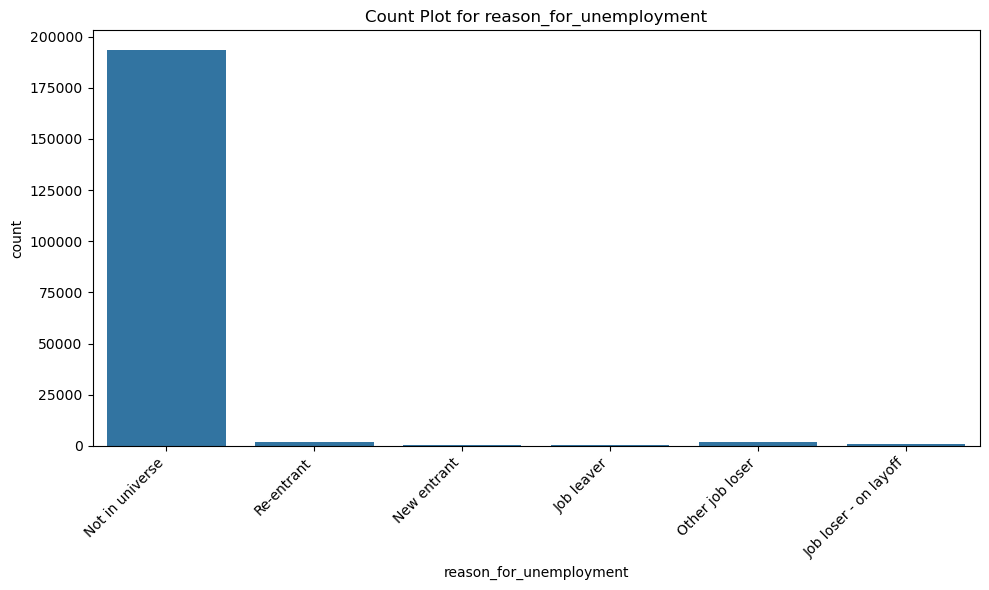


Analyzing feature: region_of_previous_residence

Value counts and percentages for 'region_of_previous_residence':
                               Count  Percentage
region_of_previous_residence                    
Not in universe               183692       92.09
South                           4889        2.45
West                            4073        2.04
Midwest                         3574        1.79
Northeast                       2705        1.36
Abroad                           530        0.27

Unique values: 6
Missing values: 0


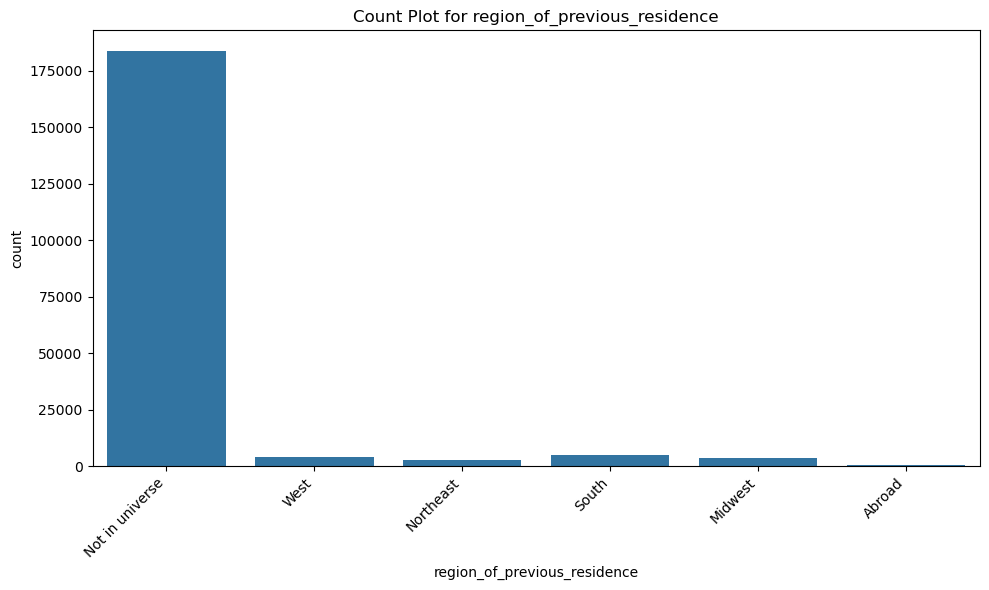


Analyzing feature: sex

Value counts and percentages for 'sex':
         Count  Percentage
sex                       
Female  103952       52.12
Male     95511       47.88

Unique values: 2
Missing values: 0


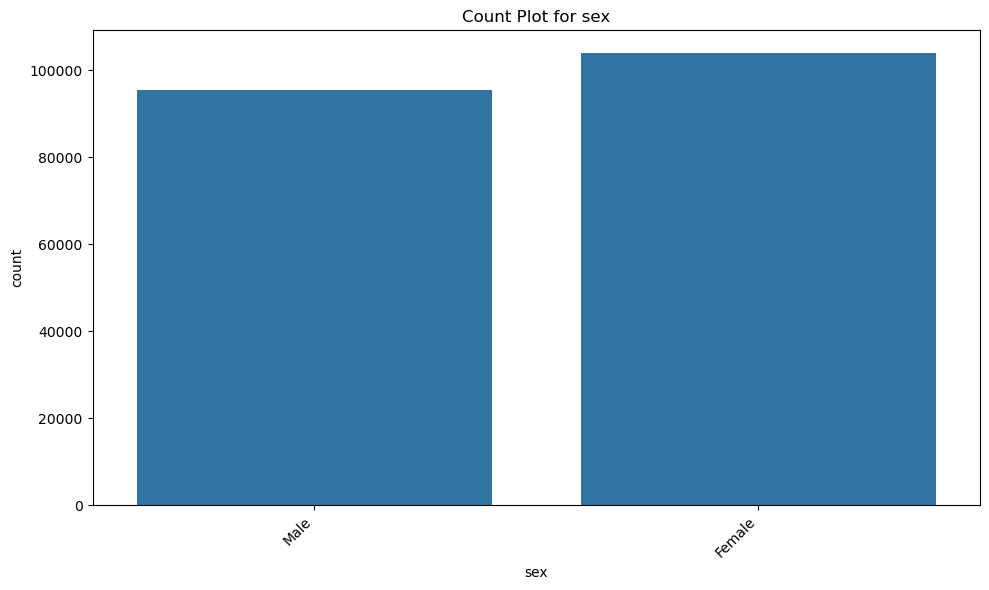


Analyzing feature: state_of_previous_residence

Value counts and percentages for 'state_of_previous_residence':
                              Count  Percentage
state_of_previous_residence                    
Not in universe              183692       92.09
California                     1714        0.86
Utah                           1063        0.53
Florida                         849        0.43
North Carolina                  812        0.41
?                               708        0.35
Abroad                          670        0.34
Oklahoma                        625        0.31
Minnesota                       576        0.29
Indiana                         533        0.27
North Dakota                    499        0.25
New Mexico                      463        0.23
Michigan                        441        0.22
Alaska                          290        0.15
Kentucky                        244        0.12
Arizona                         243        0.12
New Hampshire          

<Figure size 1000x600 with 0 Axes>

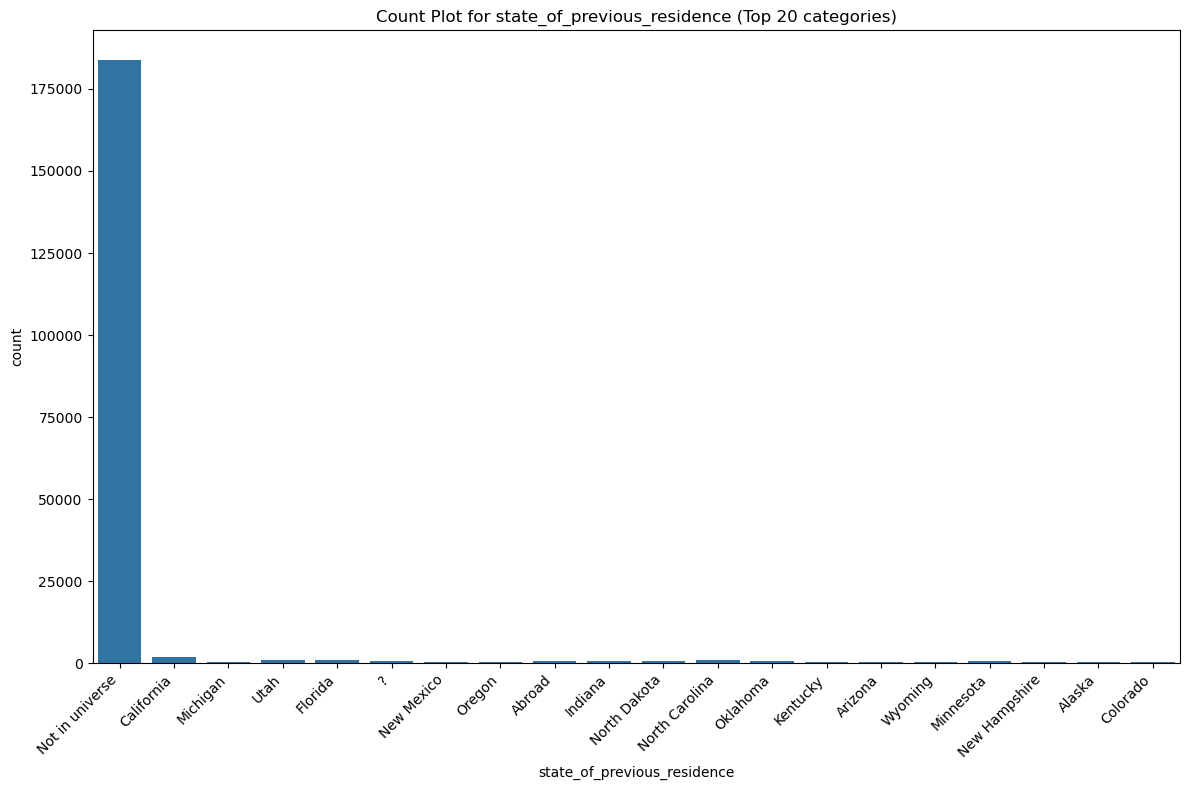


Analyzing feature: tax_filer_stat

Value counts and percentages for 'tax_filer_stat':
                              Count  Percentage
tax_filer_stat                                 
Nonfiler                      75072       37.64
Joint both under 65           67365       33.77
Single                        37410       18.76
Joint both 65+                 8330        4.18
Head of household              7422        3.72
Joint one under 65 & one 65+   3864        1.94

Unique values: 6
Missing values: 0


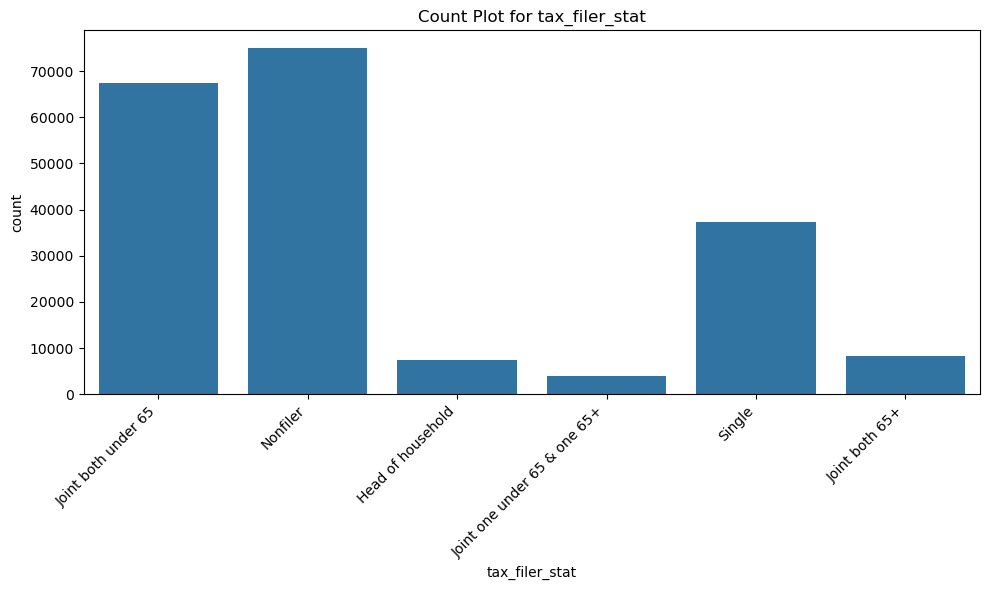

In [19]:
result = ke.analyze_cat_feat(df)

In [20]:
ke.analyze_num_feat(df)

TypeError: data type 'numeric' not understood

# 5. Feature Engineering

Feature engineering is the process of transforming variables so that they are potentially more useful for the task at hand. Domain expertise is extremely useful for feature engineering. Hence, it is always important to try and understand as much as you can about the problem's domain.

Apart from using domain knowledge, we can also perform some simple feature engineering by aggregating different categories within a variable.

When conducting feature engineering, it is important to keep in mind the task at hand and take reference from the insights that were derived from the EDA. This will ensure that the features that were created will be useful for the task at hand. The main task that you are feature engineering for is unsupervised learning (clustering).

#### 5.1. Engineer 3 new features for this dataset. Briefly explain why you chose these features and how you think they could be useful for clustering.

# 6. Reproducible Data Pipeline

#### 6.1. Finally, take all the code you've written and create a Python module named `datapipeline.py` in the [src folder](./src). The module should at least contain the following function. The transform function should take in the absolute path to the data file as a parameter and return a pandas dataframe.

```python
def transform(data_path):
  """
  :param data_path: ......
  :return: ......
  """
  return feature_engineered_dataframe
```

# 7. Submission


#### 7.1. Create a `conda.yml` file at the base of the assignment folder. Add (manually) your required dependencies to the file named `conda.yml` .

# Explore Clustering Algorithms

Load the '[`A1P2_clustering.ipynb`](A1P2_clustering.ipynb)' notebook and start working from there.

<h1><center>End of Assignment 1 - Part 1: Data Cleaning & Feature Engineering</center></h1>